In [101]:
import pandas as pd  
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Tryna read or load the file in

In [22]:
UniversalBank = pd.DataFrame({'ID' : [1, 2, 3, 4, 5, 6, 7, 8, 9], 'Age' : [25, 45, 39, 35, 35, 37, 53, 50, 35], 'Experience' : [1, 19, 15, 9, 8, 13, 27, 24, 10], 'Income' : [49, 34, 11, 100, 45, 29, 72, 22, 81], 'Zipcode' : [91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 90089], 'Family' : [4, 3, 1, 1, 4, 4, 2, 1, 3], 'CCAvg': [1.60, 1.50, 1.00, 2.70, 1.00, 0.40, 1.50, 0.30, 0.60] })

In [24]:
UniversalBank.to_csv('UniversalBank.csv', index = False)

In [26]:
UniversalBank = pd.read_csv('UniversalBank.csv')

In [27]:
UniversalBank.head()

,ID,Age,Experience,Income,Zipcode,Family,CCAvg,Mortgage,Personal Loan,Securities,CD Account,Online,Credit Card
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1


# tryna rename the columns

In [30]:
UniversalBank = UniversalBank.rename(columns = {'Personal Loan' : 'Personal_Loan', 'Securities' : 'Securities_Account', 'CD Account' : 'CD_Account', 'Credit Card' : 'CreditCard'})

In [32]:
UniversalBank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Zipcode', 'Family', 'CCAvg',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

# tryna check for the missing values

In [34]:
UniversalBank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
Zipcode               0
Family                0
CCAvg                 0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

# tryna provide the statistic of the data

In [35]:
UniversalBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  9 non-null      int64  
 1   Age                 9 non-null      int64  
 2   Experience          9 non-null      int64  
 3   Income              9 non-null      int64  
 4   Zipcode             9 non-null      int64  
 5   Family              9 non-null      int64  
 6   CCAvg               9 non-null      float64
 7   Mortgage            9 non-null      int64  
 8   Personal_Loan       9 non-null      int64  
 9   Securities_Account  9 non-null      int64  
 10  CD_Account          9 non-null      int64  
 11  Online              9 non-null      int64  
 12  CreditCard          9 non-null      int64  
dtypes: float64(1), int64(12)
memory usage: 1.0 KB


In [36]:
UniversalBank.describe()
#From my data all statistics seems okay

,ID,Age,Experience,Income,Zipcode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.0,9.000000,9.000000
mean,5.000000,39.333333,14.000000,49.222222,92135.777778,2.555556,1.177778,28.777778,0.0,0.222222,0.0,0.333333,0.222222
std,2.738613,8.660254,8.231039,29.511768,1736.254070,1.333333,0.747960,58.510208,0.0,0.440959,0.0,0.500000,0.440959
min,1.000000,25.000000,1.000000,11.000000,90089.000000,1.000000,0.300000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,3.000000,35.000000,9.000000,29.000000,91107.000000,1.000000,0.600000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,5.000000,37.000000,13.000000,45.000000,91711.000000,3.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,7.000000,45.000000,19.000000,72.000000,93943.000000,4.000000,1.500000,0.000000,0.0,0.000000,0.0,1.000000,0.000000
max,9.000000,53.000000,27.000000,100.000000,94720.000000,4.000000,2.700000,155.000000,0.0,1.000000,0.0,1.000000,1.000000


# Tryna remove the record which has the min of Zipcode 90089

In [38]:
UniversalBank[UniversalBank.Zipcode == 90089]

,ID,Age,Experience,Income,Zipcode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0
8,9,35,10,81,90089,3,0.6,104,0,0,0,1,0


In [40]:
data = UniversalBank.drop([1], axis = 0) #dropping record with zipcode 90089

In [41]:
data

,ID,Age,Experience,Income,Zipcode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,104,0,0,0,1,0


In [45]:
correlation = data.corr()
correlation

,ID,Age,Experience,Income,Zipcode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,0.620901,0.598874,0.158421,-0.238739,-0.132453,-0.529868,0.412535,NaN,-0.662266,NaN,0.607527,0.260133
Age,0.620901,1.000000,0.992254,-0.125791,0.312024,-0.557121,-0.255920,-0.162822,NaN,-0.613396,NaN,0.280634,0.266480
Experience,0.598874,0.992254,1.000000,-0.181729,0.329909,-0.560017,-0.293965,-0.110960,NaN,-0.583596,NaN,0.318132,0.189097
Income,0.158421,-0.125791,-0.181729,1.000000,-0.339035,-0.034266,0.666532,-0.024201,NaN,-0.027739,NaN,0.255261,-0.351442
Zipcode,-0.238739,0.312024,0.329909,-0.339035,1.000000,-0.797028,0.196924,-0.392782,NaN,-0.311767,NaN,-0.539459,0.090779
Family,-0.132453,-0.557121,-0.560017,-0.034266,-0.797028,1.000000,-0.249626,0.467474,NaN,0.428571,NaN,0.292770,0.000000
CCAvg,-0.529868,-0.255920,-0.293965,0.666532,0.196924,-0.249626,1.000000,-0.501244,NaN,0.236825,NaN,-0.319191,-0.381310
Mortgage,0.412535,-0.162822,-0.110960,-0.024201,-0.392782,0.467474,-0.501244,1.000000,NaN,-0.212787,NaN,0.726805,-0.325037
Personal_Loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities_Account,-0.662266,-0.613396,-0.583596,-0.027739,-0.311767,0.428571,0.236825,-0.212787,NaN,1.000000,NaN,-0.292770,-0.218218


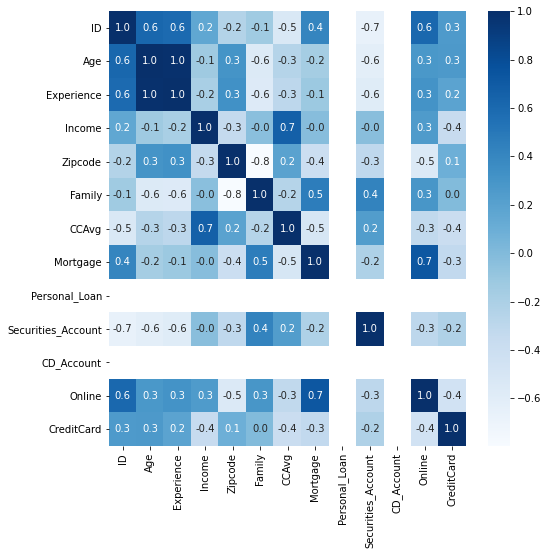

In [51]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, fmt = '.1f', annot = True, cmap = 'Blues')

# This is a Classification problem

In [52]:
data.head()

,ID,Age,Experience,Income,Zipcode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,155,0,0,0,1,0


In [55]:
data  = data[['Age', 'Experience', 'Income', 'Zipcode', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Personal_Loan' ]]

In [59]:
x = data.drop(['Personal_Loan'], axis = 1)

In [61]:
y = data[['Personal_Loan']]

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state =2)

In [90]:
model = KNeighborsClassifier(n_neighbors = 3)

In [105]:
model.fit(x_train, y_train)

<ipython-input-105-139fa7af76d2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [93]:
b_train = y_train.values

In [106]:
pred = model.predict(x_test)

In [100]:
print(confusion_matrix(y_test, pred))

[[2]]


In [99]:
y_test

,Personal_Loan
5,0
2,0


In [102]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

